In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200)

In [2]:
df = pd.read_csv(r"C:\Users\pc\Desktop\Pro_Jets\CC EDA&ML\Data\bank-call-center-interaction-logs.csv")
df.head()


,interaction_id,customer_id,agent_id,interaction_datetime,interaction_duration_seconds,call_direction,call_channel,call_status,customer_satisfaction_score,speech_sentiment_score,speech_transcript,topics_detected,issue_resolved,follow_up_required,follow_up_due_date,language,customer_feedback_text,agent_notes
0,INT00001,CUST00001,AGT0001,2024-01-01T09:10:13,415,inbound,phone,completed,4.7,0.82,"Hello, I need help resetting my password please.","password_reset,online_banking",True,False,NaN,en,"Thank you for your help, great service.",Customer called regarding password reset. Issue resolved during the call. Provided instructions and ensured access was restored.
1,INT00002,CUST00002,AGT0002,2024-01-01T11:24:50,23,outbound,phone,dropped,NaN,NaN,NaN,NaN,False,False,NaN,en,NaN,Call dropped instantly. No customer response.
2,INT00003,CUST00003,AGT0003,2024-01-01T13:32:05,198,inbound,chat,completed,4.1,0.63,"Hi, I want to check my last three statements.","statement_request,balance_inquiry",True,False,NaN,es,"Gracias, todo bien.",Customer requested recent statements. Provided download links and confirmed understanding.
3,INT00004,CUST00001,AGT0004,2024-01-02T10:45:14,37,inbound,phone,abandoned,0.0,-0.95,NaN,NaN,False,False,NaN,en,NaN,Caller disconnected before an agent could answer.
4,INT00005,CUST00004,AGT0001,2024-01-02T15:08:55,720,inbound,phone,completed,4.5,0.91,I am having trouble with my debit card online purchase.,"card_issue,online_payment",True,False,NaN,en,Resolved my issue quickly.,Customer reported card decline online. Walked through troubleshooting and resolved the problem.


In [3]:
df_copy = df.copy()

df_copy.describe()

,interaction_duration_seconds,customer_satisfaction_score,speech_sentiment_score
count,200.000000,154.000000,144.000000
mean,276.165000,3.307143,0.423194
std,271.466828,1.532016,0.546828
min,18.000000,0.000000,-1.000000
25%,61.750000,3.050000,0.440000
50%,203.500000,3.900000,0.600000
75%,393.000000,4.300000,0.770000
max,1680.000000,4.900000,0.970000


In [4]:
# df_copy.describe(include='all')

In [5]:
df_copy.info()
df_copy.isna().mean().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   interaction_id                200 non-null    object 
 1   customer_id                   200 non-null    object 
 2   agent_id                      200 non-null    object 
 3   interaction_datetime          200 non-null    object 
 4   interaction_duration_seconds  200 non-null    int64  
 5   call_direction                200 non-null    object 
 6   call_channel                  200 non-null    object 
 7   call_status                   200 non-null    object 
 8   customer_satisfaction_score   154 non-null    float64
 9   speech_sentiment_score        144 non-null    float64
 10  speech_transcript             137 non-null    object 
 11  topics_detected               135 non-null    object 
 12  issue_resolved                200 non-null    bool   
 13  follo

follow_up_due_date              0.915
customer_feedback_text          0.375
topics_detected                 0.325
speech_transcript               0.315
speech_sentiment_score          0.280
customer_satisfaction_score     0.230
customer_id                     0.000
interaction_id                  0.000
agent_id                        0.000
interaction_datetime            0.000
call_channel                    0.000
call_status                     0.000
interaction_duration_seconds    0.000
call_direction                  0.000
follow_up_required              0.000
issue_resolved                  0.000
language                        0.000
agent_notes                     0.000
dtype: float64

In [6]:
df_copy["call_channel"].unique()

array(['phone', 'chat', 'video'], dtype=object)

In [18]:
# Convert datetime
df_copy["interaction_datetime"] = pd.to_datetime(df_copy["interaction_datetime"], errors="coerce")

# Create time features
df_copy["call_hour"] = df_copy["interaction_datetime"].dt.hour
df_copy["call_dayofweek"] = df_copy["interaction_datetime"].dt.day_name()

# Convert topics to lists
df_copy["topics_detected"] = df_copy["topics_detected"].fillna("").apply(
    lambda x: [i.strip() for i in x.split(",") if i]
)

# Ensure numeric columns are numeric
df_copy["interaction_duration_seconds"] = pd.to_numeric(df_copy["interaction_duration_seconds"], errors="coerce")
df_copy["customer_satisfaction_score"] = pd.to_numeric(df_copy["customer_satisfaction_score"], errors="coerce")
df_copy["speech_sentiment_score"] = pd.to_numeric(df_copy["speech_sentiment_score"], errors="coerce")

In [ ]:
df_copy.duplicated().sum()

In [26]:
df_copy["issue_resolved"].mean()


# So we can already say:

# Many calls are NOT resolved,
# but only a small % escalate to structured follow-ups.

# That’s a meaningful future insight.


np.float64(0.59)

In [23]:
df_copy["follow_up_required"].mean()

np.float64(0.085)

In [7]:
df_copy['interaction_datetime'] = pd.to_datetime(df_copy['interaction_datetime'], errors='coerce')
df_copy['follow_up_due_date'] = pd.to_datetime(df_copy['follow_up_due_date'], errors='coerce')

df_copy['issue_resolved'] = df_copy['issue_resolved'].astype(bool)
df_copy['follow_up_required'] = df_copy['follow_up_required'].astype(bool)

numeric_cols = [
    'interaction_duration_seconds',
    'customer_satisfaction_score',
    'speech_sentiment_score'
]

df_copy[numeric_cols] = df_copy[numeric_cols].apply(pd.to_numeric, errors='coerce')



In [8]:
df_copy['hour'] = df_copy['interaction_datetime'].dt.hour
df_copy['weekday'] = df_copy['interaction_datetime'].dt.day_name()
df_copy['is_weekend'] = df_copy['weekday'].isin(['Saturday','Sunday'])
df_copy.tail()

,interaction_id,customer_id,agent_id,interaction_datetime,interaction_duration_seconds,call_direction,call_channel,call_status,customer_satisfaction_score,speech_sentiment_score,...,topics_detected,issue_resolved,follow_up_required,follow_up_due_date,language,customer_feedback_text,agent_notes,hour,weekday,is_weekend
195,INT40046,CUST10046,AGT2010,2024-04-11 15:34:00,216,inbound,chat,completed,3.9,0.54,...,"fund_transfer,account_access",True,False,NaT,en,Transfer was fast.,Assisted with fund transfer via chat. No issues.,15,Thursday,False
196,INT40047,CUST10047,AGT2011,2024-04-11 16:19:00,89,inbound,phone,abandoned,NaN,NaN,...,NaN,False,False,NaT,en,NaN,Caller abandoned after waiting for agent.,16,Thursday,False
197,INT40048,CUST10048,AGT2012,2024-04-11 17:07:00,187,inbound,phone,completed,4.1,0.61,...,"account_closure,credit_card",True,False,NaT,en,Everything was clear.,Credit card closed upon customer's request.,17,Thursday,False
198,INT40049,CUST10049,AGT2001,2024-04-12 08:17:00,69,inbound,phone,dropped,NaN,NaN,...,NaN,False,False,NaT,en,NaN,Call dropped before agent joined.,8,Friday,False
199,INT40050,CUST10050,AGT2002,2024-04-12 09:06:00,255,inbound,chat,completed,4.2,0.66,...,"exchange_rate,information_request",True,False,NaT,en,Answered my question quickly.,Provided exchange rate information via chat.,9,Friday,False


In [9]:
topics_2 = (
    df_copy.assign(topic=df_copy['topics_detected'].str.split(','))
      .explode('topic')
)

topics_2['topic'] = topics_2['topic'].str.strip()

topic_duration_2 = (
    topics_2.groupby('topic')['interaction_duration_seconds']
    .mean()
    .sort_values(ascending=False)
)

topic_duration_2

topic
complaint           941.2
event_invitation    927.0
account_issues      883.0
account_fees        829.0
features            811.0
                    ...  
limit_increase      121.0
checking_account    117.0
address_change      114.0
payment_inquiry      89.0
email_update         73.0
Name: interaction_duration_seconds, Length: 92, dtype: float64

In [10]:
topics = df_copy.assign(topic=df_copy['topics_detected'].str.split(',')) \
           .explode('topic')

topic_duration = (
    topics.groupby('topic')['interaction_duration_seconds']
    .mean()
    .sort_values(ascending=False)
)

topic_duration



topic
complaint           941.2
event_invitation    927.0
account_issues      883.0
account_fees        829.0
features            811.0
                    ...  
limit_increase      121.0
checking_account    117.0
address_change      114.0
payment_inquiry      89.0
email_update         73.0
Name: interaction_duration_seconds, Length: 92, dtype: float64

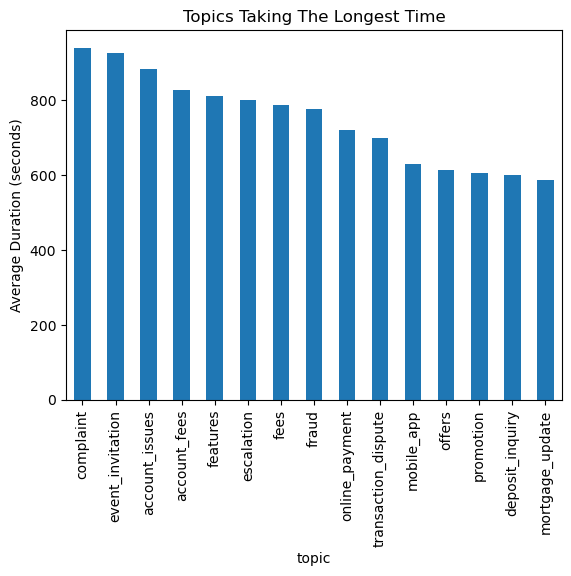

In [11]:
topic_duration.head(15).plot(kind='bar')
plt.ylabel("Average Duration (seconds)")
plt.title("Topics Taking The Longest Time")
plt.show()

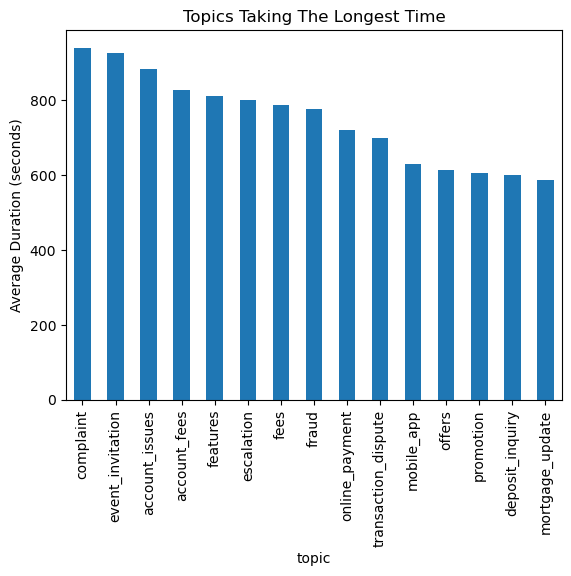

In [12]:
topic_duration_2.head(15).plot(kind='bar')
plt.ylabel("Average Duration (seconds)")
plt.title("Topics Taking The Longest Time")
plt.show()

In [13]:
agent_resolution = (
   df_copy.groupby('agent_id')['issue_resolved']
      .mean()
      .sort_values(ascending=False)
)

agent_resolution


agent_id
AGT0001    1.0
AGT0005    1.0
AGT0008    1.0
AGT0016    1.0
AGT0013    1.0
          ... 
AGT5037    0.0
AGT5040    0.0
AGT5043    0.0
AGT5046    0.0
AGT5047    0.0
Name: issue_resolved, Length: 144, dtype: float64

In [14]:
df_copy['agent_id'].value_counts()

agent_id
AGT2002    5
AGT2001    5
AGT2009    4
AGT2010    4
AGT2006    4
          ..
AGT5035    1
AGT5047    1
AGT5048    1
AGT5049    1
AGT5050    1
Name: count, Length: 144, dtype: int64

In [15]:
csat_by_hour = (
    df_copy.groupby('hour')['customer_satisfaction_score']
      .mean()
      .sort_values()
)

csat_by_hour

hour
19    1.800000
11    2.536364
8     2.771429
17    2.781818
16    3.125000
9     3.155556
10    3.315789
14    3.322222
15    3.627778
12    3.781818
13    3.980952
18    4.150000
21         NaN
Name: customer_satisfaction_score, dtype: float64

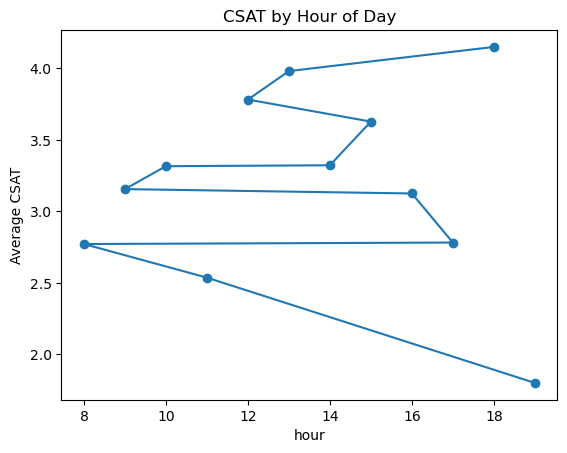

In [16]:
csat_by_hour.plot(kind='line', marker='o')
plt.ylabel("Average CSAT")
plt.title("CSAT by Hour of Day")
plt.show()

In [17]:
df_copy.groupby('weekday')['customer_satisfaction_score'].mean().sort_values()


weekday
Thursday     2.878261
Sunday       3.043750
Friday       3.343750
Wednesday    3.346667
Tuesday      3.360000
Monday       3.410345
Saturday     3.840000
Name: customer_satisfaction_score, dtype: float64